<a href="https://colab.research.google.com/github/rtomek9/project_votingGroup23DS3001/blob/main/votingEDAandwrangling_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! git clone https://github.com/rtomek9/project_votingGroup23DS3001

Cloning into 'project_votingGroup23DS3001'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 103 (delta 8), reused 4 (delta 4), pack-reused 90
Receiving objects: 100% (103/103), 32.69 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [8]:
!pip install shap
!pip install category_encoders

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import sklearn # The machine learning library we will be using in this entire course
from sklearn import tree # Tree function is used for visualizing decision tree
from sklearn.metrics import * # Importing function that can be used to calculate different metrics
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Algorithm
from sklearn.ensemble import RandomForestClassifier # Importing Randomg Forest Algorithm
from sklearn.model_selection import train_test_split # Importing function that can split a dataset into training and testing set
from sklearn.preprocessing import MinMaxScaler # Importing function for scaling the data
from sklearn.ensemble import GradientBoostingClassifier # Importing GB Classifier
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
import matplotlib.pyplot as plt # Importing the package for plotting
import seaborn as sns # Importing another package for plotting
from category_encoders import * # Importing the package for handling categorical variables
import shap # Import shap package for interpreting the results
from mlxtend.plotting import plot_confusion_matrix # To plot the confusion matrix

In [11]:
df = pd.read_csv('/content/voting/data/county_adjacencies.csv')

In [12]:
df.head()

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2 = pd.read_csv('/content/voting/data/voting_VA.csv')

In [14]:
df2.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3736 non-null   int64 
 1   year            3736 non-null   int64 
 2   state           3736 non-null   object
 3   state_po        3736 non-null   object
 4   county_name     3736 non-null   object
 5   county_fips     3736 non-null   int64 
 6   office          3736 non-null   object
 7   candidate       3736 non-null   object
 8   party           3736 non-null   object
 9   candidatevotes  3736 non-null   int64 
 10  totalvotes      3736 non-null   int64 
 11  version         3736 non-null   int64 
 12  mode            3736 non-null   object
dtypes: int64(6), object(7)
memory usage: 379.6+ KB


In [16]:
df2.dropna()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [17]:
df2['candidate'].unique()

array(['AL GORE', 'GEORGE W. BUSH', 'RALPH NADER', 'OTHER', 'JOHN KERRY',
       'BARACK OBAMA', 'JOHN MCCAIN', 'MITT ROMNEY', 'HILLARY CLINTON',
       'DONALD TRUMP', 'JOSEPH R BIDEN JR', 'JO JORGENSEN',
       'DONALD J TRUMP'], dtype=object)

In [18]:
df2['year'].unique()

array([2000, 2004, 2008, 2012, 2016, 2020])

In [19]:
df2['county_name'].unique()

array(['ACCOMACK', 'ALBEMARLE', 'ALLEGHANY', 'AMELIA', 'AMHERST',
       'APPOMATTOX', 'ARLINGTON', 'AUGUSTA', 'BATH', 'BEDFORD', 'BLAND',
       'BOTETOURT', 'BRUNSWICK', 'BUCHANAN', 'BUCKINGHAM', 'CAMPBELL',
       'CAROLINE', 'CARROLL', 'CHARLES CITY', 'CHARLOTTE', 'CHESTERFIELD',
       'CLARKE', 'CRAIG', 'CULPEPER', 'CUMBERLAND', 'DICKENSON',
       'DINWIDDIE', 'ESSEX', 'FAIRFAX', 'FAUQUIER', 'FLOYD', 'FLUVANNA',
       'FRANKLIN', 'FREDERICK', 'GILES', 'GLOUCESTER', 'GOOCHLAND',
       'GRAYSON', 'GREENE', 'GREENSVILLE', 'HALIFAX', 'HANOVER',
       'HENRICO', 'HENRY', 'HIGHLAND', 'ISLE OF WIGHT', 'JAMES CITY',
       'KING AND QUEEN', 'KING GEORGE', 'KING WILLIAM', 'LANCASTER',
       'LEE', 'LOUDOUN', 'LOUISA', 'LUNENBURG', 'MADISON', 'MATHEWS',
       'MECKLENBURG', 'MIDDLESEX', 'MONTGOMERY', 'NELSON', 'NEW KENT',
       'NORTHAMPTON', 'NORTHUMBERLAND', 'NOTTOWAY', 'ORANGE', 'PAGE',
       'PATRICK', 'PITTSYLVANIA', 'POWHATAN', 'PRINCE EDWARD',
       'PRINCE GEORGE', 'PRINCE

In [20]:
df2['party'].unique()

array(['DEMOCRAT', 'REPUBLICAN', 'GREEN', 'OTHER', 'LIBERTARIAN'],
      dtype=object)

In [21]:
df2['mode'].unique()

array(['TOTAL', 'ABSENTEE', 'ELECTION DAY', 'PROVISIONAL'], dtype=object)

In [22]:
df2['office'].unique()

array(['US PRESIDENT'], dtype=object)

In [23]:
#df2.groupby('candidate', as_index = False).totalvotes#.apply(lambda x: (x.mean()))
candidate_group = df2.groupby('candidate')['candidatevotes'].sum()
candidate_group.head(20)

candidate
AL GORE              1216422
BARACK OBAMA         3931352
DONALD J TRUMP       1962430
DONALD TRUMP         1769443
GEORGE W. BUSH       3153836
HILLARY CLINTON      1981473
JO JORGENSEN           64761
JOHN KERRY           1454742
JOHN MCCAIN          1725005
JOSEPH R BIDEN JR    2413568
MITT ROMNEY          1822522
OTHER                 406335
RALPH NADER            59373
Name: candidatevotes, dtype: int64

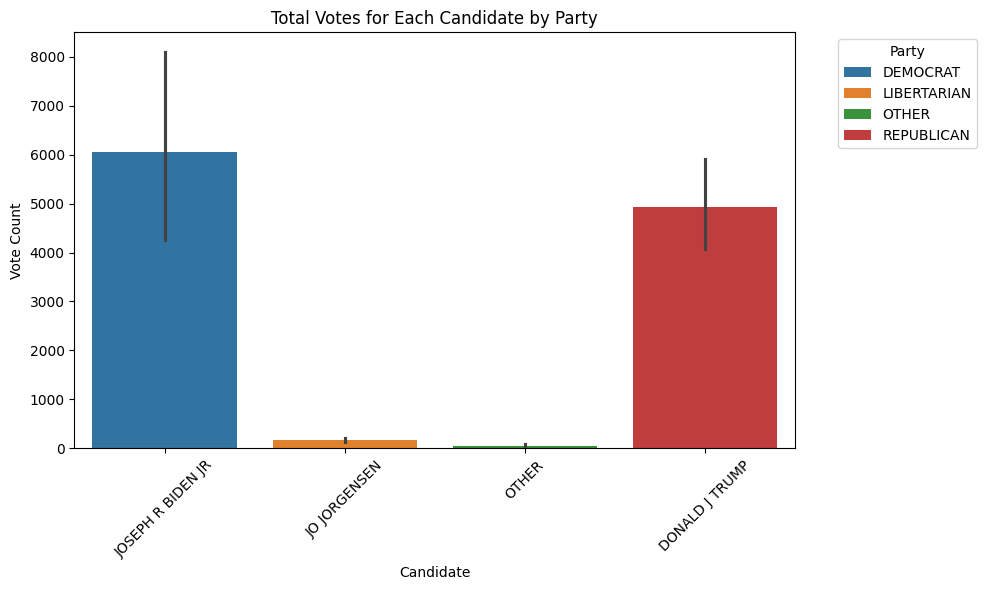

In [24]:
from_2020 = df2.query("year ==2020")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2020, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

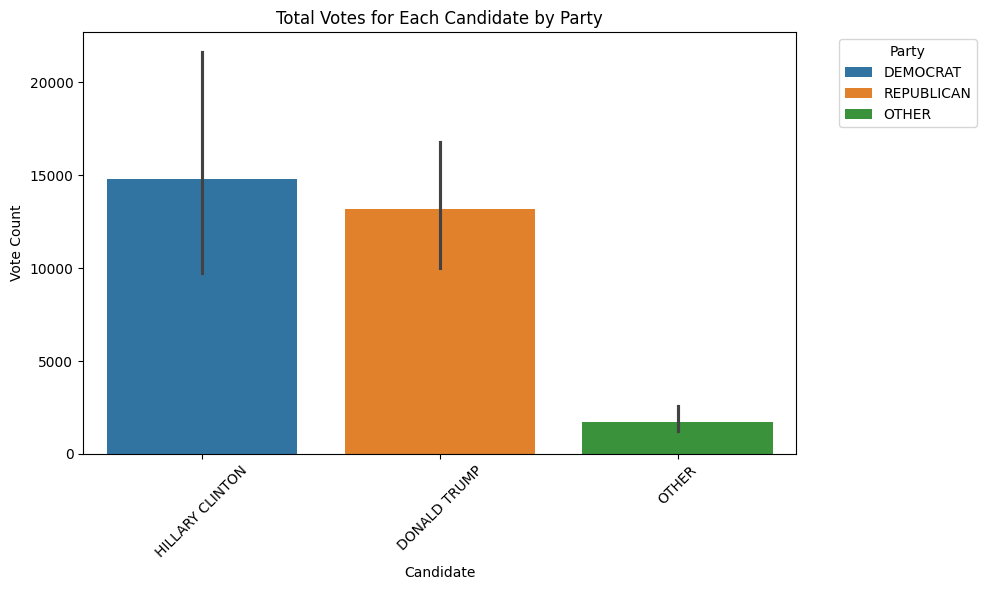

In [25]:
from_2016 = df2.query("year ==2016")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2016, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

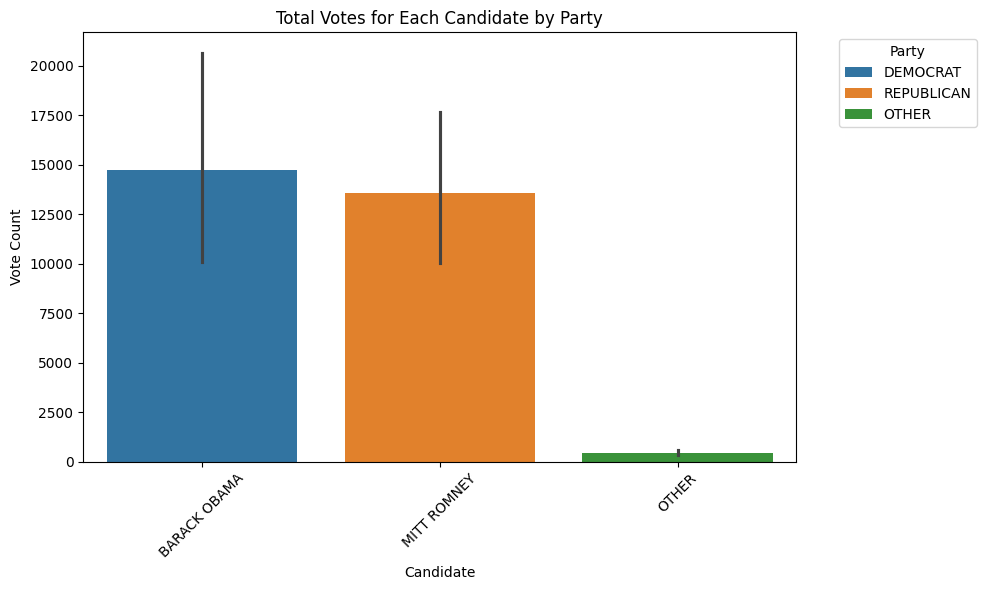

In [26]:
from_2012 = df2.query("year ==2012")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2012, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

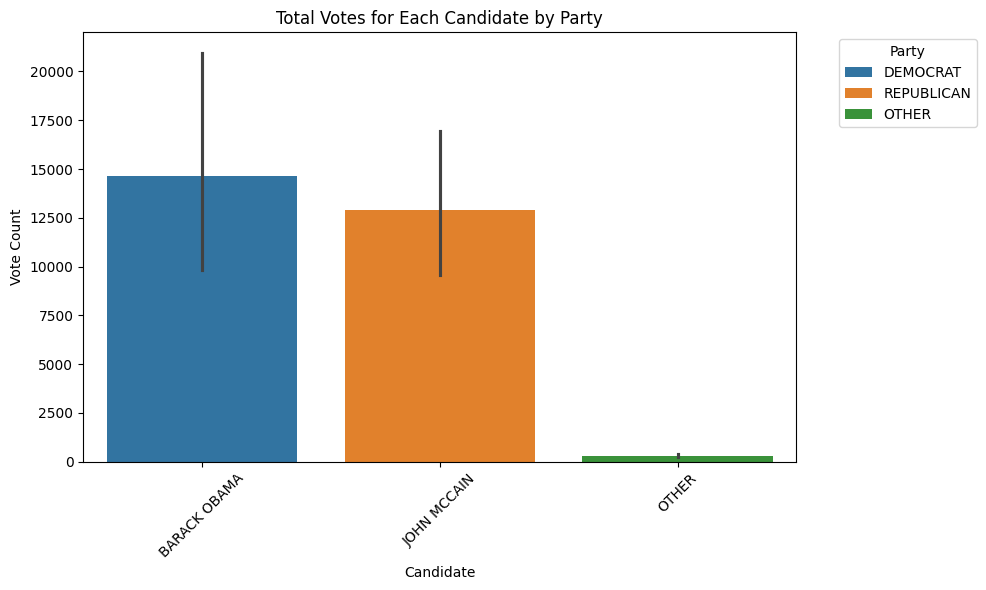

In [27]:
from_2008 = df2.query("year ==2008")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2008, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
#going to run an xgboost model to come up with targets for 'democrat' or 'republican'
#first, need to join two datasets on FIPS code so that voting data is aligned with income and poverty etc data

In [29]:
dfc = pd.read_csv('/content/voting/data/most_recent_countyincome_withFIPS.csv', encoding='latin-1')
dfc.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,FIPS CODE,STATE,STATEA,COUNTY,COUNTYA,...,AM8FE031,AM8FE032,AM8FE033,AM8FE034,AM8FE035,AM8FE036,AM8FE037,AM8FE038,AM8FE039,AM9SE001
0,G0100010,2016-2020,AL,NaN,NaN,1001,Alabama,1.0,Autauga County,1,...,11323,2064,9259,2741,898,1843,1962,1255,707,0.4552
1,G0100030,2016-2020,AL,NaN,NaN,1003,Alabama,1.0,Baldwin County,3,...,44915,5851,39064,14209,2921,11288,9539,4370,5169,0.4566
2,G0100050,2016-2020,AL,NaN,NaN,1005,Alabama,1.0,Barbour County,5,...,4243,859,3384,1554,436,1118,1074,709,365,0.5047
3,G0100070,2016-2020,AL,NaN,NaN,1007,Alabama,1.0,Bibb County,7,...,4217,656,3561,1098,235,863,871,433,438,0.4500
4,G0100090,2016-2020,AL,NaN,NaN,1009,Alabama,1.0,Blount County,9,...,11211,1898,9313,3137,674,2463,2456,1211,1245,0.4685


In [30]:
dfc2 = dfc.query('STUSAB=="VA"')
dfc2.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,FIPS CODE,STATE,STATEA,COUNTY,COUNTYA,...,AM8FE031,AM8FE032,AM8FE033,AM8FE034,AM8FE035,AM8FE036,AM8FE037,AM8FE038,AM8FE039,AM9SE001
2821,G5100010,2016-2020,VA,NaN,NaN,51001,Virginia,51.0,Accomack County,1,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
2822,G5100030,2016-2020,VA,NaN,NaN,51003,Virginia,51.0,Albemarle County,3,...,20763,1248,19515,6183,723,5460,4898,2124,2774,0.4719
2823,G5100050,2016-2020,VA,NaN,NaN,51005,Virginia,51.0,Alleghany County,5,...,3052,523,2529,1071,288,783,836,442,394,0.4537
2824,G5100070,2016-2020,VA,NaN,NaN,51007,Virginia,51.0,Amelia County,7,...,2667,379,2288,746,114,632,570,265,305,0.4320
2825,G5100090,2016-2020,VA,NaN,NaN,51009,Virginia,51.0,Amherst County,9,...,6596,771,5825,2009,472,1537,1636,695,941,0.4239


In [31]:
dfc2['county_fips'] = dfc2['FIPS CODE']

<ipython-input-31-3437647d532f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc2['county_fips'] = dfc2['FIPS CODE']


In [32]:
dfc2.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,FIPS CODE,STATE,STATEA,COUNTY,COUNTYA,...,AM8FE032,AM8FE033,AM8FE034,AM8FE035,AM8FE036,AM8FE037,AM8FE038,AM8FE039,AM9SE001,county_fips
2821,G5100010,2016-2020,VA,NaN,NaN,51001,Virginia,51.0,Accomack County,1,...,823,5651,2376,426,1950,1683,920,763,0.4562,51001
2822,G5100030,2016-2020,VA,NaN,NaN,51003,Virginia,51.0,Albemarle County,3,...,1248,19515,6183,723,5460,4898,2124,2774,0.4719,51003
2823,G5100050,2016-2020,VA,NaN,NaN,51005,Virginia,51.0,Alleghany County,5,...,523,2529,1071,288,783,836,442,394,0.4537,51005
2824,G5100070,2016-2020,VA,NaN,NaN,51007,Virginia,51.0,Amelia County,7,...,379,2288,746,114,632,570,265,305,0.4320,51007
2825,G5100090,2016-2020,VA,NaN,NaN,51009,Virginia,51.0,Amherst County,9,...,771,5825,2009,472,1537,1636,695,941,0.4239,51009


In [33]:
df2.head(10)

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
5,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL
6,11167,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,RALPH NADER,GREEN,2043,36846,20220315,TOTAL
7,11168,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,OTHER,OTHER,257,36846,20220315,TOTAL
8,11169,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,AL GORE,DEMOCRAT,2214,5123,20220315,TOTAL
9,11170,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL


In [34]:

merged_data = pd.merge(df2, dfc2, on='county_fips')
merged_data.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,AM8FE031,AM8FE032,AM8FE033,AM8FE034,AM8FE035,AM8FE036,AM8FE037,AM8FE038,AM8FE039,AM9SE001
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
4,20838,2004,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,JOHN KERRY,DEMOCRAT,5518,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562


In [35]:
column_list = list(merged_data.columns)
print(column_list)

['Unnamed: 0', 'year', 'state', 'state_po', 'county_name', 'county_fips', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes', 'version', 'mode', 'GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'FIPS CODE', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'COUSUBA', 'PLACEA', 'TRACTA', 'CONCITA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITSCEA', 'ANRCA', 'CBSAA', 'CSAA', 'METDIVA', 'NECTAA', 'CNECTAA', 'NECTADIVA', 'UAA', 'CDCURRA', 'SLDUA', 'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA', 'SDSECA', 'SDUNIA', 'PCI', 'PUMAA', 'GEOID', 'NAME', 'BTTRA', 'AM0KE001', 'AM0KE002', 'AM0KE003', 'AM0KE004', 'AM0KE005', 'AM0KE006', 'AM63E001', 'AM63E002', 'AM63E003', 'AM63E004', 'AM63E005', 'AM63E006', 'AM63E007', 'AM63E008', 'AM63E009', 'AM63E010', 'AM63E011', 'AM63E012', 'AM63E013', 'AM63E014', 'AM63E015', 'AM63E016', 'AM63E017', 'AM63E018', 'AM63E019', 'AM63E020', 'AM63E021', 'AM63E022', 'AM63E023', 'AM63E024', 'AM63E025', 'AM63E026', 'AM63E027', 'AM63E028', 'AM63E029', 'AM63E030', 'AM63E0

In [36]:
drop_columns = ['candidate', 'candidatevotes','year','county_fips', 'Unnamed: 0']
merged_data = merged_data.drop(drop_columns, axis=1)

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


encoder = BaseNEncoder(cols=['GISJOIN', # Categorical variable to be encoded
                             'YEAR', # Categorical variable to be encoded
                             'STUSAB', # Categorical variable to be encoded
                             'STATE', # Categorical variable to be encoded
                             'COUNTY', # Categorical variable to be encoded
                             'GEOID',
                             'NAME', 'BTTRA','mode','state','state_po','county_name','office','party'
                             # Categorical variable to be encoded
                            ],
                        base = 3 # Increasing this value will create fewer variables
                      ).fit(merged_data)

df_encod = encoder.transform(merged_data)


In [38]:
df_encod.head()

,state_0,state_po_0,county_name_0,county_name_1,county_name_2,county_name_3,county_name_4,office_0,party_0,party_1,...,AM8FE031,AM8FE032,AM8FE033,AM8FE034,AM8FE035,AM8FE036,AM8FE037,AM8FE038,AM8FE039,AM9SE001
0,1,1,0,0,0,0,1,1,0,1,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
1,1,1,0,0,0,0,1,1,0,2,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
2,1,1,0,0,0,0,1,1,1,0,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
3,1,1,0,0,0,0,1,1,1,1,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562
4,1,1,0,0,0,0,1,1,0,1,...,6474,823,5651,2376,426,1950,1683,920,763,0.4562


In [39]:
X = df_encod.drop(columns = ['party_0','party_1','mode_1','mode_0', 'totalvotes','state_0'])
y = df_encod.party_1

In [40]:
from sklearn.linear_model import LinearRegression # Import linear regression model

vars = ['AM8FE038','AM63E033','AM63E051','AM70E007','AM8FE010'] # This is a list of variables to use

X = X.loc[:,vars] # Construct data matrix
X.head() # Peek at data

# AM8FE038 = Female: 75 years and over with a disability
# AM63E033 = Income in the past 12 months at or above poverty level: Male: Under 5 years
# AM63E051 = Income in the past 12 months at or above poverty level: Female: 15 years
# AM70E007 = Income in the past 12 months below poverty level: 60 to 74 years

,AM8FE038,AM63E033,AM63E051,AM70E007,AM8FE010
0,920,566,136,848,78
1,920,566,136,848,78
2,920,566,136,848,78
3,920,566,136,848,78
4,920,566,136,848,78


In [41]:
df = pd.read_csv('/content/voting/data/voting_VA.csv')

df = df[['year', 'county_fips', 'candidate', 'party', 'candidatevotes']]

pivot_df = df.pivot_table(index=['year', 'county_fips'], columns='party', values='candidatevotes', aggfunc='sum', fill_value=0)

# Calculate net votes: Republican - Democrat
pivot_df['net_votes'] = pivot_df.get('REPUBLICAN', 0) - pivot_df.get('DEMOCRAT', 0)

# Apply the inverse hyperbolic sine transformation to net votes
pivot_df['net_votes_arsinh'] = np.arcsinh(pivot_df['net_votes'])

pivot_df.reset_index(inplace=True)

print(pivot_df.head())

# Add features from previous XGBoost Classifier
additional_data = pd.read_csv('/content/voting/data/most_recent_countyincome_withFIPS.csv', encoding='latin-1')
features = additional_data[['FIPS CODE', 'AM8FE038', 'AM63E033', 'AM63E051', 'AM70E007','AM8FE010']]
features.rename(columns={'FIPS CODE': 'county_fips'}, inplace=True)

features['county_fips'] = features['county_fips'].astype(str).str.zfill(5)
pivot_df['county_fips'] = pivot_df['county_fips'].astype(str).str.zfill(5)

merged_df = pd.merge(pivot_df, features, on='county_fips', how='left')
merged_df['AM8FE038'].fillna(merged_df['AM8FE038'].mean(), inplace=True)
merged_df['AM63E033'].fillna(merged_df['AM63E033'].mean(), inplace=True)
merged_df['AM63E051'].fillna(merged_df['AM63E051'].mean(), inplace=True)
merged_df['AM70E007'].fillna(merged_df['AM70E007'].mean(), inplace=True)
merged_df['AM8FE010'].fillna(merged_df['AM8FE010'].mean(), inplace=True)
print(merged_df.head())

party  year  county_fips  DEMOCRAT  GREEN  LIBERTARIAN  OTHER  REPUBLICAN  \
0      2000        51001      5092    220            0    261        6352   
1      2000        51003     16255   2043            0    257       18291   
2      2000        51005      2214     62            0     39        2808   
3      2000        51007      1754     40            0     47        2947   
4      2000        51009      4812    135            0    105        6660   

party  net_votes  net_votes_arsinh  
0           1260          7.832014  
1           2036          8.311890  
2            594          7.080027  
3           1193          7.777374  
4           1848          8.215007  
   year county_fips  DEMOCRAT  GREEN  LIBERTARIAN  OTHER  REPUBLICAN  \
0  2000       51001      5092    220            0    261        6352   
1  2000       51003     16255   2043            0    257       18291   
2  2000       51005      2214     62            0     39        2808   
3  2000       51007      17

<ipython-input-41-c1a965eb4d74>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.rename(columns={'FIPS CODE': 'county_fips'}, inplace=True)
<ipython-input-41-c1a965eb4d74>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['county_fips'] = features['county_fips'].astype(str).str.zfill(5)


In [42]:
X = merged_df.drop(['net_votes', 'net_votes_arsinh'], axis=1)
X = X.loc[:,['AM8FE038', 'AM63E033','AM63E051','AM70E007','AM8FE010']]
y = merged_df['net_votes_arsinh']
X.head()

,AM8FE038,AM63E033,AM63E051,AM70E007,AM8FE010
0,920.0,566.0,136.0,848.0,78.0
1,2124.0,2633.0,711.0,801.0,571.0
2,442.0,257.0,43.0,452.0,142.0
3,265.0,363.0,76.0,225.0,93.0
4,695.0,760.0,106.0,467.0,280.0


In [43]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.027586548484004214


,variable,coefficient
0,AM8FE038,0.007136
1,AM63E033,-0.003483
2,AM63E051,0.006102
3,AM70E007,-0.003115
4,AM8FE010,-0.002322


<Axes: xlabel='net_votes_arsinh', ylabel='Density'>

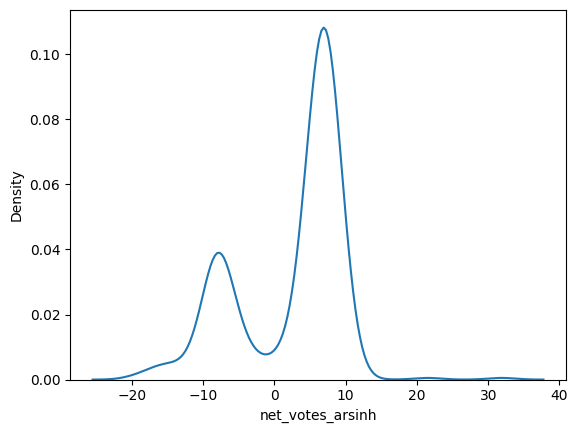

In [44]:
sns.kdeplot(merged_df['net_votes_arsinh'] -reg.predict(X) ) # Residual plot